<a href="https://colab.research.google.com/github/njeruhi/Research/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import matplotlib.pyplot as plt
import numpy as np

In [102]:
faces = [
    np.array([[1, 0],
              [0, 1]]),
    np.array([[0.8, 0],
              [0, 0.7]]),
    np.array([[0.9, 0],
              [0, 0.8]]),
    np.array([[0.9, 0],
              [0, 0.7]]),
    np.array([[1, 0],
              [0, 0.7]]),
    np.array([[0.9, 0],
              [0, 0.7]]),
    np.array([[0.9, 0],
              [0, 1]]),
    np.array([[0.9, 0],
              [0, 1]]),
    np.array([[0.9, 0],
              [0, 1]]),
    np.array([[0.9, 0],
              [0, 1]]),
    np.array([[0.9, 0],
              [0, 1]]),

]

In [103]:
def show_sample(faces):
  for i in faces:
    plt.subplot(121)
    plt.imshow(i, cmap='Greys_r')
    plt.show()

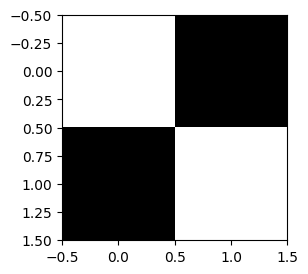

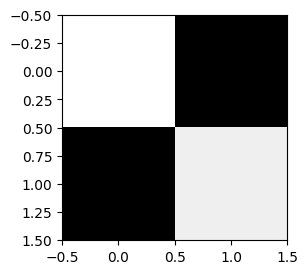

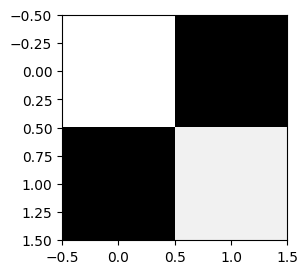

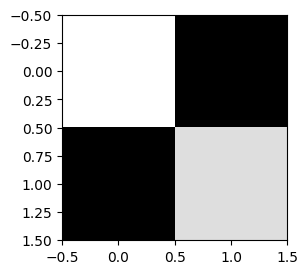

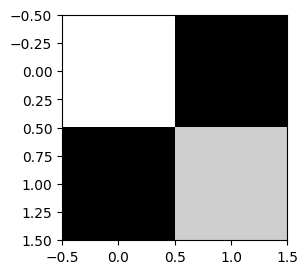

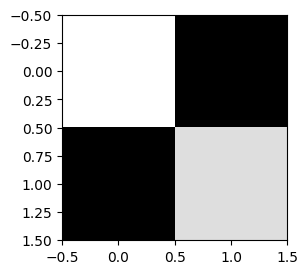

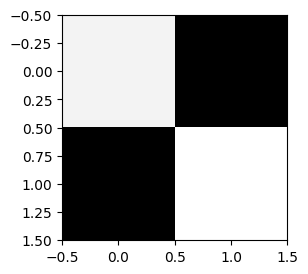

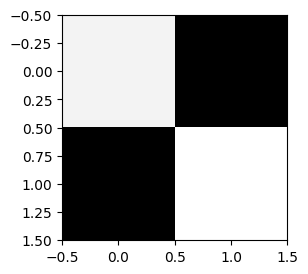

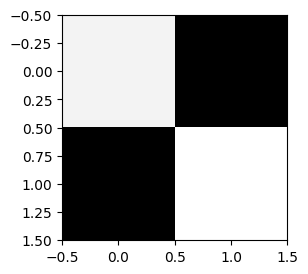

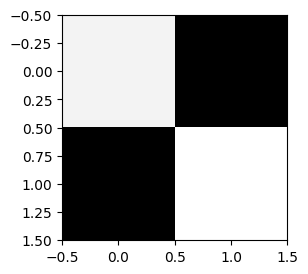

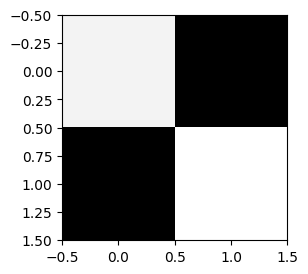

In [104]:
show_sample(faces)

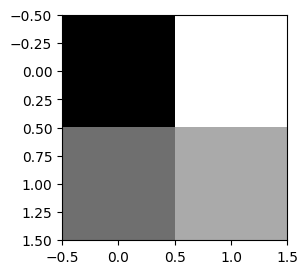

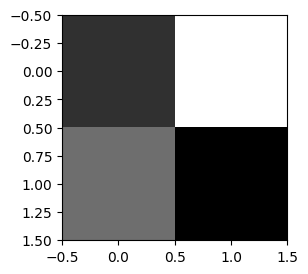

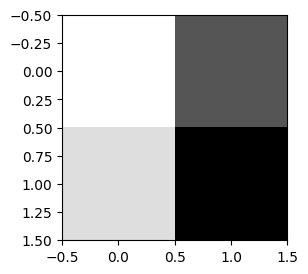

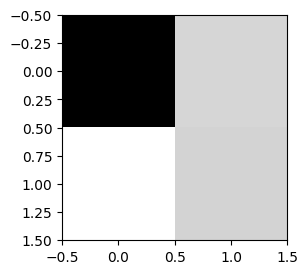

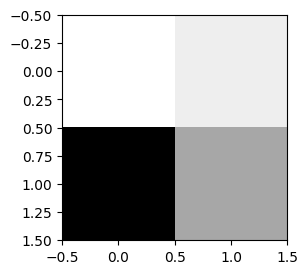

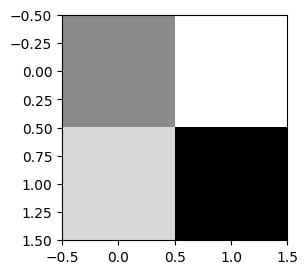

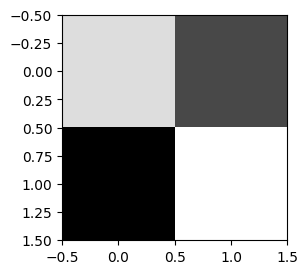

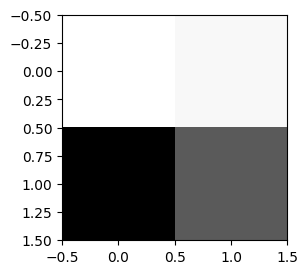

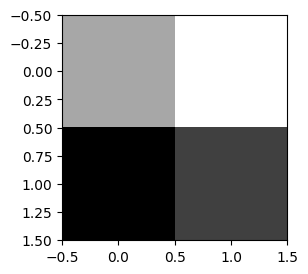

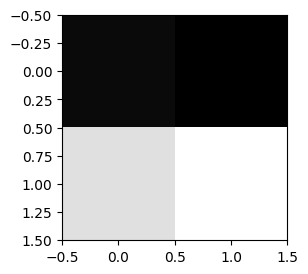

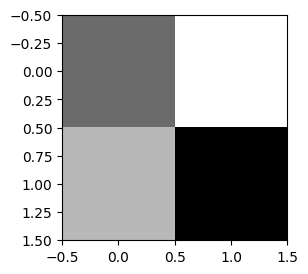

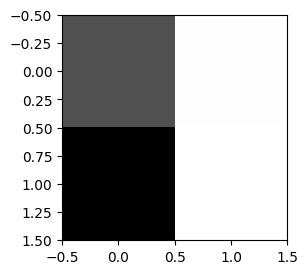

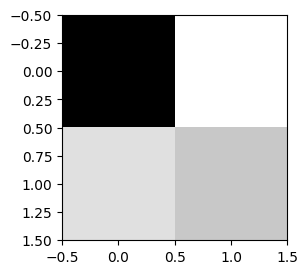

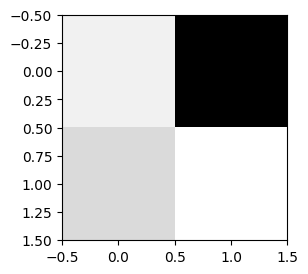

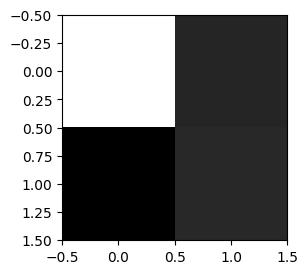

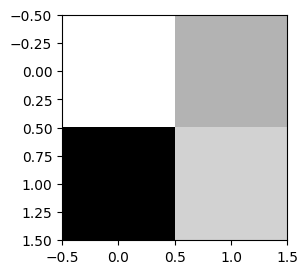

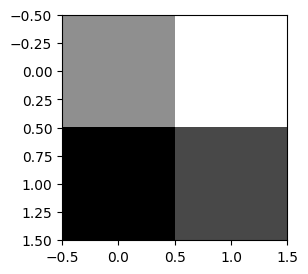

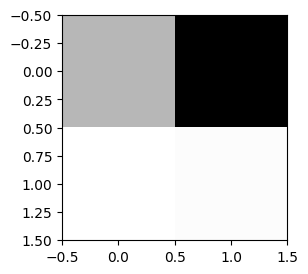

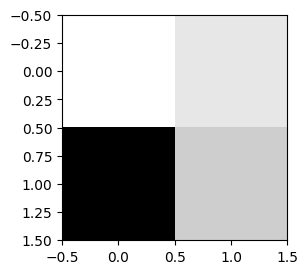

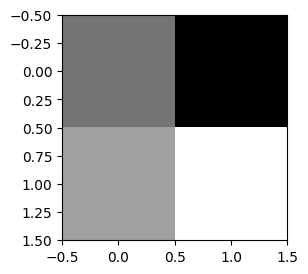

In [105]:
noise = [np.random.randn(2, 2) for i in range(20)]
def generate(img):
  return [np.random.random((2, 2)), np.random.random((2, 2)), np.random.random((2, 2)), np.random.random((2, 2))]
show_sample(noise)

# GAN

**Discriminator**

---



    (x) = sigmoid(XiWi + b)

 Loss function from images

    E = -ln(D(x))

 Loss from noise

    E = -ln(1 - D(x))

In [106]:
def sigmoid(x):
  z = 1/(1 + np.exp(-x))
  return z

lr = 0.01

In [107]:
class Discriminator():
  def __init__(self):
    self.weights = [np.random.randn() for i in range(4)]
    self.bias = np.random.normal()

  def forward(self, x):
    out = sigmoid(np.dot(x, np.reshape(self.weights, (2, 2))) + self.bias)
    return out

  def loss_of_image(self, x):
    x = self.forward(x)
    # calculate the loss using the -log(x)
    return -np.log(x)

  def derivatives_from_image(self, x):
    pred = self.forward(x)
    d_w = -(1 - pred) *  -x
    d_b = -(1 - pred)
    return d_w, d_b

  def loss_of_noise(self, x):
    x = self.forward(x)
    return -np.log(1 - x)

  def derivatives_from_noise(self, x):
    pred = self.foward(x)
    d_w = pred * x
    d_b = pred
    return d_w, d_b

  def update_from_img(self, img):
    d_w = 0
    d_b = 0
    derivatives = self.derivatives_from_image(img)
    d_w -= lr * derivatives[0]
    d_b -= lr * derivatives[1]
    return d_b, d_w

  def update_from_noise(self, noise):
    d_w = 0
    d_b = 0
    derivatives = self.derivatives_from_image(noise)
    d_w -= lr * derivatives[0]
    d_b -= lr * derivatives[1]
    return d_b, d_w

**Generator**

---


    G(z) = (sigmoid(Vi.z + C))

Loss function(error)

    E = -ln(D(G(z)))

In [108]:
class Generator():

  def __init__(self):
    self.weights = [np.random.randn() for i in range(4)]
    self.bias = np.random.randn()

  def forward(self, x):
    return sigmoid(np.dot(x, np.reshape(self.weights, (2, 2))) + self.bias)

  def error(self, x, discriminator):
    pred = self.forward(x)
    return -np.log(discriminator.forward(pred))

  def derivatives(self, z, discriminator):
    dis_weights = discriminator.weights
    dis_bias = discriminator.bias
    pred = self.forward(z)
    y = discriminator.forward
    factor = -(1 - y(pred)) * (pred * (1 - pred))
    d_w = factor * z
    d_b = factor
    return d_b, d_w

  def updates(self, z, discriminator):
    prev_err = self.error(z, discriminator)
    ders = self.derivatives(z, discriminator)
    self.weights = np.reshape(self.weights, (2, 2))
    self.weights-= lr * ders[0]
    self.bias -= lr * ders[1]
    update = self.error(z, discriminator)
    print('model weights:', self.weights)

#Training

In [116]:
import random

np.random.seed(42)

lr = 0.01
epochs = 100

D = Discriminator()
G = Generator()

errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
  for face in faces:
    D.update_from_img(face)

    # generate a random face
    z = random.random()

    # calculate the loss of the discriminator
    errors_discriminator.append(sum(D.loss_of_image(face) + D.loss_of_noise(face)))

    # calculate the loss of the generator
    errors_generator.append(sum(G.error(z, D)))

    # Generate a face
    noise = G.forward(z)

    # Update the discriminator weights from the fake face
    D.update_from_noise(noise)

    # Update the generator weights from the fake face
    G.updates(z, D)



model weights: [[-0.23327948  1.57967553]
 [ 0.76819571 -0.46857219]]
model weights: [[-0.23239767  1.58046252]
 [ 0.7690745  -0.46776602]]
model weights: [[-0.23153744  1.58097548]
 [ 0.76985707 -0.46687947]]
model weights: [[-0.230685    1.58135768]
 [ 0.77057721 -0.46595292]]
model weights: [[-0.22983114  1.58177239]
 [ 0.77131397 -0.4650372 ]]
model weights: [[-0.22896583  1.58236848]
 [ 0.77212855 -0.46417593]]
model weights: [[-0.22811924  1.58262003]
 [ 0.77276325 -0.4632051 ]]
model weights: [[-0.22727221  1.58289941]
 [ 0.77341811 -0.46224511]]
model weights: [[-0.2264262   1.58315531]
 [ 0.77405511 -0.46127697]]
model weights: [[-0.22555453  1.58384484]
 [ 0.77490148 -0.4604441 ]]
model weights: [[-0.22468237  1.58454139]
 [ 0.77575012 -0.45961338]]
model weights: [[-0.22380363  1.58531192]
 [ 0.77662244 -0.45880445]]
model weights: [[-0.22295311  1.58570164]
 [ 0.77734354 -0.4578839 ]]
model weights: [[-0.22208165  1.58639418]
 [ 0.77819048 -0.45705256]]
model weights: [[-0.

In [110]:
pred_faces_from_weights = np.array([[0.30661628, 1.89452759],
                                    [1.22811925, 0.08065999]])

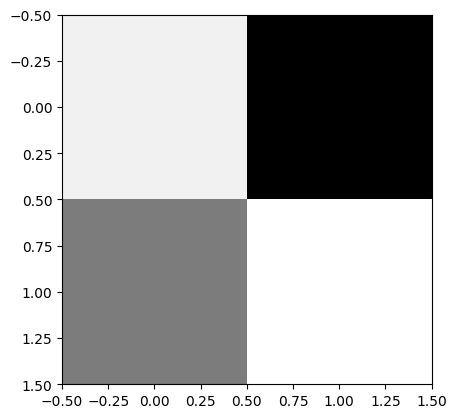

In [117]:
# prompt: generate code that can be used for inference from my mode

def generate_image(generator, z):
  """
  Generate an image from a generator and a noise vector.

  Args:
    generator: A Generator object.
    z: A noise vector.

  Returns:
    A generated image.
  """

  # Forward pass through the generator.
  pred_face = generator.forward(z)

  # Return the generated image.
  return pred_face

# Generate an image from the trained generator.
generated_image = generate_image(G, np.random.randn())

# Show the generated image.
plt.imshow(generated_image, cmap='Greys_r')
plt.show()
